# Logistic Regression

### Import the proper libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### Importing the Dataset

In [99]:
df_0 = pd.read_csv("candy-data.csv")
df_0.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


### Perform EDA

#### 1. Removing null and duplicates

In [100]:
df_0.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [101]:
df_duplicates = df_0[df_0.duplicated()]
df_duplicates.shape


(0, 13)

#### 2. Descriptive and statistical analysis

In [102]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [103]:
df_0.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


#### 3. Comparing data with data - heatmaps

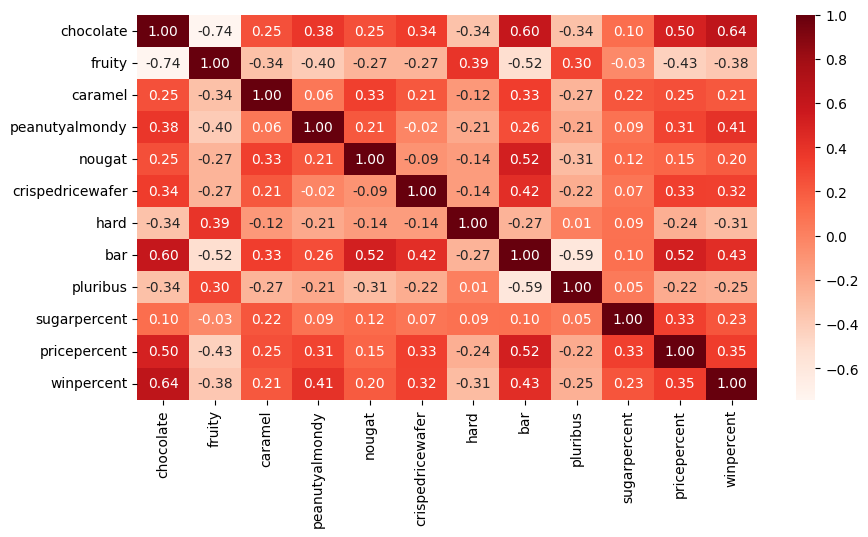

In [104]:
plt.figure(figsize=(10,5))
corr = df_0.corr(numeric_only=True)
sns.heatmap(corr,cmap='Reds',annot=True,fmt='.2f')
plt.show()

In [105]:
Y = df_0['chocolate']
X = df_0.drop({'competitorname','chocolate'},axis=1)
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 85 entries, 0 to 84
Series name: chocolate
Non-Null Count  Dtype
--------------  -----
85 non-null     int64
dtypes: int64(1)
memory usage: 812.0 bytes


In [106]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)
Y_train_df = pd.DataFrame(Y_train)
Y_test_df = pd.DataFrame(Y_test)
Y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 63 to 6
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   chocolate  63 non-null     int64
dtypes: int64(1)
memory usage: 1008.0 bytes


In [107]:
Y_train.shape

(63,)

C:\Users\user\AppData\Local\Temp\ipykernel_25364\2444853839.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="chocolate",data=Y_train_df, palette='Blues_d')


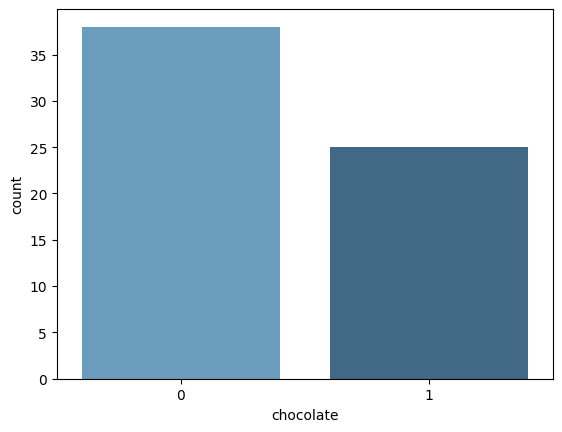

In [108]:
sns.countplot(x="chocolate",data=Y_train_df, palette='Blues_d')
plt.show()

In [109]:
logReg = LogisticRegression()

In [110]:
logReg.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [111]:
Y_predict = logReg.predict(X_test)

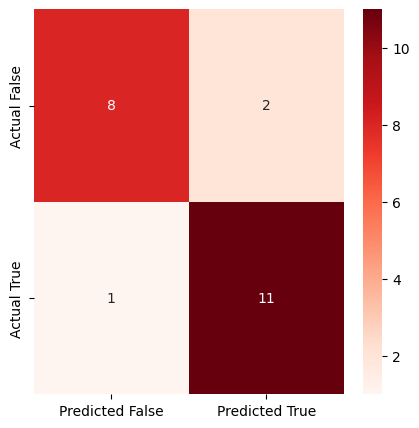

In [113]:
# plt.figure(figsize=(5,5))
# plt.scatter(Y_test,Y_predict,marker='.')
# plt.xlabel("Original")
# plt.ylabel("Predicted")
# plt.title("Org vs Pred")
# plt.show()

confMatrix = confusion_matrix(Y_test,Y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(confMatrix,annot=True,cmap='Reds',xticklabels=['Predicted False','Predicted True'],yticklabels=['Actual False','Actual True'])
plt.show()

In [116]:
import sklearn.metrics as metrics
print("Accuracy", metrics.accuracy_score(Y_test,Y_predict))
print("Precession",metrics.precision_score(Y_test,Y_predict))
print("Recall",metrics.recall_score(Y_test,Y_predict))

Accuracy 0.8636363636363636
Precession 0.8461538461538461
Recall 0.9166666666666666
